## Import Necessary Libraries

In [134]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

## Create Function Helpers

``` Create Path Function ```

In [135]:
# Create Function to create path(shortest_path) for each node 
def create_path(input_node, nodes, G):
    if input_node in nodes:
        nodes.remove(input_node)
    nodes.insert(0,input_node)
    
    return [nx.shortest_path(G, nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]

```Highlight Path Function```

In [136]:
# Highlighting edges
def highlight_path(G,pos,path):
    edge_list=set(list(zip(path,path[1:])))
    edge_label = nx.get_edge_attributes(G, 'distance')
    node_label = nx.get_node_attributes(G, 'Nama')
    
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_edges(G,pos,edgelist=edge_list,edge_color='red')
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='red')
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label)
    nx.draw_networkx_labels(G,pos, labels=node_label,font_size=7)
    
    plt.show()

``` Draw Metric Function ```

In [137]:
# Draw Metric to know more about our graph
def draw_metric(G,pos,centrality,title):
    node_color=list(centrality.values())
    
    nx.draw(G,pos,node_color=node_color, cmap='plasma')
    nx.draw_networkx_labels(G,pos, labels=node_label,font_size=7)
    
    sm= cm.ScalarMappable(cmap='plasma')
    sm.set_array(node_color)
    
    plt.title(title)
    plt.colorbar(sm)
    plt.show()
    

``` Get Time Function ```

In [138]:
# Get note attribute with routes kode_rumah and save it to temp variable
def get_time(routes,df,df2):
    temp = list()
    for index, route in enumerate(routes):
        
        # Create a list (0,1) -> edge 
        route_list=sorted(set(list(zip(route,route[1:]))))  
        
        sum = 0
        for edge in route_list:
            
            # Add Time based on distance
            df_found_1 = df_edge.loc[df_edge['source'] == edge[0]]
            df_found_2 = df_found_1.loc[df_found_1['target'] == edge[1], 'distance']
            sum = sum + (df_found_2.values)            
            
            # Add Time based on Luas Rumah 
            luas = df2.loc[df2['Kode Rumah'] == edge[1], 'Luas Rumah'].values[0]
            if luas >= 200 :
                sum = sum + 30
            else:
                sum = sum + 15
            
        temp.insert(index, sum)
    return temp

``` Makanan Function ```

In [139]:
# Get Makanan info based on nodes 
def makanan(nodes,df):
    temp_node = list()
    nodes=sorted(set(nodes[1:]))

    for index, node in enumerate(nodes):
        makanan = df.loc[df['Kode Rumah'] == node, 'Jenis Makanan']
        temp_node.insert(index, makanan.values)
    
    return temp_node

``` Calculate THR Function```

In [140]:
# Calculating THR based on how many family member is under 17 then multiply by house that we will go
def calculate_thr(df, nodes, input_user):
    # Kode rumah with age that get thr example is C13

    # Get Data from df_data that age under or same 17 then get Kode Rumah info 
    thr_age = df.loc[df['age'] <= 17]['Kode Rumah'].values 

    # Info THR Per Person
    THR = list(thr_age).count(input_user) * 50000

    return THR * len(nodes[1:])

``` To Time Function ```

In [141]:
# Function to get time data 
def to_time(input_time_user, minutes_to_add):
    current_time = pd.to_datetime(input_time_user)

    time = current_time + pd.Timedelta(minutes=minutes_to_add)

    return time

## Create Edgelist Dataset from / source picture

In [142]:
pd.DataFrame({
    'source' : ['A1','A1','A1','A1','A1','A1',
               'B1','B1','B1',
                'B2','B2','B2','B2',
               'B3','B3',
               'C1','C1','C1','C1',
               'C2','C2',
               'C3','C3','C3','C3','C3',
               'C4','C4','C4',
               'C5','C5','C5','C5',
               'C6','C6','C6','C6','C6',
               'C7','C7','C7',
               'C8','C8','C8',
               'C9','C9','C9',
               'C10','C10','C10',
               'C11','C11','C11',
               'C12','C12','C12',
               'C13','C13','C13',
               'C14','C14','C14'],
    'target' : ['B2','C13','C4','C7','C1','C6',
               'C14','C5','C9',
                'C5','C3','C12','A1',
               'C11','C10',
               'C2','C7','C6','A1',
               'C1','C8',
               'B2','C5','C9','C11','C10',
               'C7','A1','C13',
               'C6','B2','C3','B1',
               'C1','C8','C14','C5','A1',
               'C1','A1','C4',
               'C2','C14','C6',
               'B1','C3','C11',
               'C12','C3','B3',
               'C9','C3','B3',
               'C13','B2','C10',
               'C4','A1','C12',
               'C8','C6','B1'],
    'distance': [10,20,25,25,20,25,
                15,15,15,
                15,10,15,10,
                25,10,
                25,20,25,20,
                25,25,
                10,25,25,15,15,
                25,25,20,
                10,15,15,15,
                25,15,20,10,25,
                20,25,25,
                25,25,15,
                15,25,15,
                20,15,10,
                15,15,25,
                20,15,20,
                20,20,20,
                25,20,15]
}).to_csv('edgelist.csv',index=None)


## Read and Get dataset edgelist and save it in variable

In [143]:
# Read file from filepath
df_edge = pd.read_csv(r'C:\Users\pradi\Documents\Sekolah\Artificial Intellingence\Belajar dan dokumentasi\Try_Provinsi_2023\edgelist.csv')
df_edge.head()

,source,target,distance
0,A1,B2,10
1,A1,C13,20
2,A1,C4,25
3,A1,C7,25
4,A1,C1,20


## Read and Get dataset data and save it in variable

In [144]:
# Read file from filepath
df_data = pd.read_csv(r'C:\Users\pradi\Documents\Sekolah\Artificial Intellingence\Belajar dan dokumentasi\Try_Provinsi_2023\dataset_cleaned.csv')
df_data.head()

,NIK,Nama,TTL,Status Hubungan,Status Perkawinan,Gaji,Jenis Pekerjaan,Agama,Jenis Makanan,Kode Rumah,Luas Rumah,age
0,3.359990e+15,Pak Sutajo,"jember, 28 07 1933",Kepala Keluarga,kawin,3000000,Pensiunan,Islam,rawon,A1,280,90
1,3.357030e+15,Bu Sutajo,"jember, 12 07 1940",Istri,kawin,0,Tidak Bekerja,Islam,rawon,A1,280,83
2,3.356440e+15,Pak Jais,"jember, 01 07 1963",Kepala Keluarga,kawin,3000000,Pensiunan,Islam,bakso,B1,240,60
3,3.355550e+15,Bu Jais,"jember, 15 03 1966",Istri,kawin,0,Tidak Bekerja,Islam,bakso,B1,240,57
4,3.354210e+15,Pak Pardi,"jember, 14 12 1965",Kepala Keluarga,kawin,3000000,Pensiunan,Islam,rawon,B2,240,58


## Create and Get dataset node and save it in variable

In [145]:
# Create new df from df_data with agg 
df_node = df_data.groupby('Kode Rumah').agg({
    'Kode Rumah' : 'first',
    'Nama' : 'first',
    'Gaji' : 'sum',
    'Luas Rumah' : 'first',
    'Jenis Makanan' : 'first'
}).reset_index(drop=True)

# Save it to nodes.csv file
df_node.to_csv('nodes.csv')
df_node

,Kode Rumah,Nama,Gaji,Luas Rumah,Jenis Makanan
0,A1,Pak Sutajo,3000000,280,rawon
1,B1,Pak Jais,3000000,240,bakso
2,B2,Pak Pardi,3000000,240,rawon
3,B3,Pak Udin,6000000,260,ayam bakar
4,C1,Pak Suprapto,14322614,200,bakso
5,C10,Pak Mariono,10285054,180,soto
6,C11,Pak Mardi,2865885,100,opor
7,C12,Pak Karel,9175753,110,soto
8,C13,Pak Tiono,13282357,230,bakso
9,C14,Pak Baim,13624923,180,soto


# Graph Session

{'A1': Text(0.25152457207390744, -0.3426848748575014, 'Pak Sutajo'),
 'B2': Text(-0.1651803837027852, -0.10222890336685274, 'Pak Pardi'),
 'C13': Text(-0.04573953923622409, -0.5794727209312979, 'Pak Tiono'),
 'C4': Text(0.2570236694588279, -0.6867218659064743, 'Pak Qodri'),
 'C7': Text(0.5149702842320807, -0.55184195523514, 'Pak Hari'),
 'C1': Text(0.6130968355917019, -0.22887261307739626, 'Pak Suprapto'),
 'C6': Text(0.3933243553182165, 0.07293620893281484, 'Pak Parjo'),
 'B1': Text(-0.014867478131415708, 0.5563294491799552, 'Pak Jais'),
 'C14': Text(0.39901719863153257, 0.4396930458462986, 'Pak Baim'),
 'C5': Text(-0.04311761873021462, 0.21453751662886975, 'Pak Joko'),
 'C9': Text(-0.43505884719563104, 0.5460463324801397, 'Pak Fahri'),
 'C3': Text(-0.45058505089701906, 0.2046773984043739, 'Pak Karno'),
 'C12': Text(-0.41029998657068084, -0.3555875299258643, 'Pak Karel'),
 'B3': Text(-1.0, 0.18601310272806804, 'Pak Udin'),
 'C11': Text(-0.7560897261548614, 0.4145839706097306, 'Pak Mar

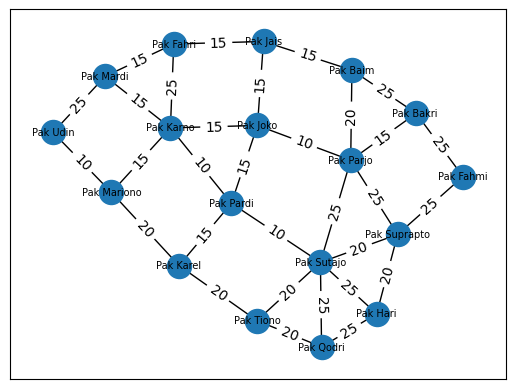

In [146]:
# Create Graph from pandas data (data include source, target, attributes(if necessary))
G = nx.from_pandas_edgelist(df_edge,'source','target','distance')

# Sort nodes based on Alphabet
nodes = list(sorted(G.nodes()))

# Create Position with Spring layout from networkx 
pos = nx.spring_layout(G,seed=1)

# Set Attribute each node from dataset df_node
for _,row in df_node.iterrows():
    node = row['Kode Rumah']
    attributes = {
        'Nama' : row['Nama'],
        'Gaji' : row['Gaji'],
        'Luas Rumah' : row['Luas Rumah'],
        'Jenis Makanan' : row['Jenis Makanan']
    }
    nx.set_node_attributes(G, {node : attributes})

# Get attributes value with desired key
edge_label = nx.get_edge_attributes(G, 'distance')
node_label = nx.get_node_attributes(G, 'Nama')
    
# Create Graph
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label)
nx.draw_networkx_labels(G,pos, labels=node_label,font_size=7)


### Draw closeness centrality to know depper about our graph

C:\Users\pradi\AppData\Local\Temp\ipykernel_21564\2598085306.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


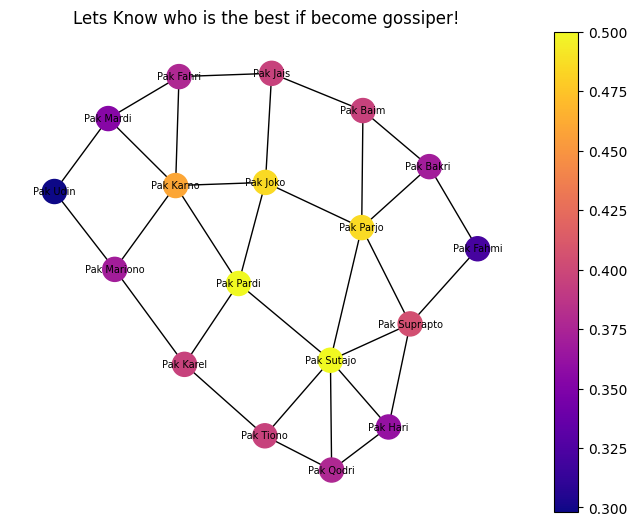

In [147]:
# Create degree metrics variable
degree = nx.closeness_centrality(G)

draw_metric(G,pos,degree,'Lets Know who is the best if become gossiper!')

### Draw degree centrality to know depper about our graph

C:\Users\pradi\AppData\Local\Temp\ipykernel_21564\2598085306.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


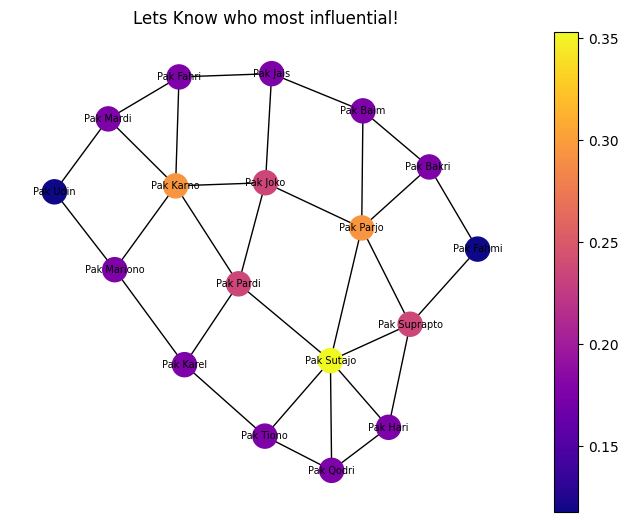

In [148]:
# Create degree metrics variable
degree = nx.degree_centrality(G)

draw_metric(G,pos,degree,'Lets Know who most influential!')

### Draw Eigenvector centrality to know depper about our graph

C:\Users\pradi\AppData\Local\Temp\ipykernel_21564\2598085306.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


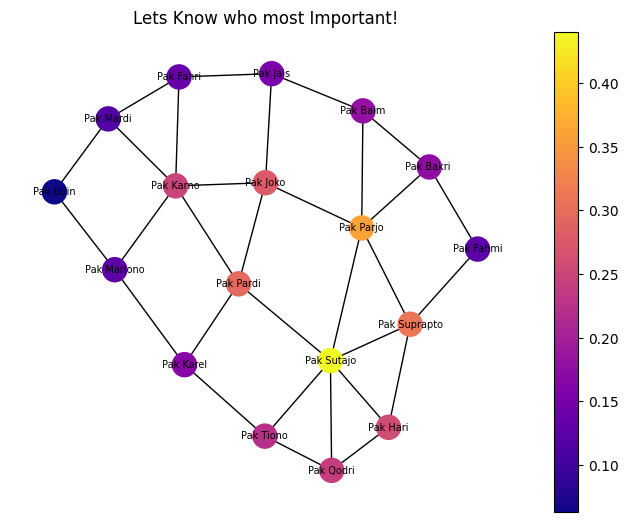

In [149]:
# Create eigenvector metrics variable
eigenvector = nx.eigenvector_centrality(G)

draw_metric(G,pos,eigenvector,'Lets Know who most Important!')

### Draw Betweeness centrality to know depper about our graph

C:\Users\pradi\AppData\Local\Temp\ipykernel_21564\2598085306.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


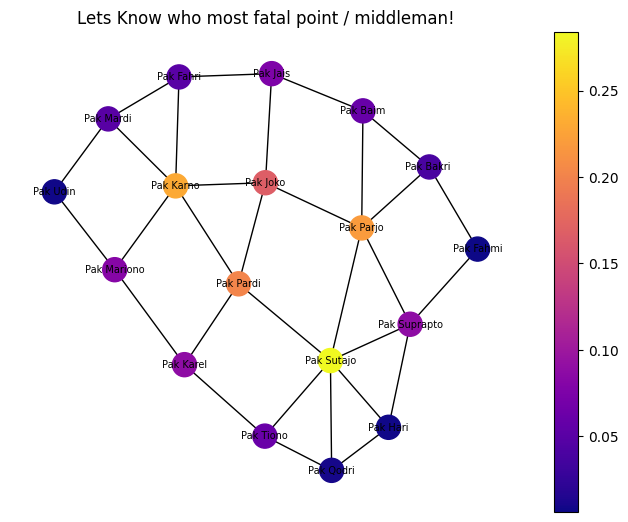

In [150]:
# Create eigenvector metrics variable
betweeness = nx.betweenness_centrality(G)

draw_metric(G,pos,betweeness,'Lets Know who most fatal point / middleman!')

# Create Path

[['C14', 'C6', 'A1'], ['A1', 'C6', 'C14', 'B1'], ['B1', 'C5', 'B2'], ['B2', 'C3', 'C11', 'B3'], ['B3', 'C11', 'C3', 'B2', 'A1', 'C1'], ['C1', 'A1', 'B2', 'C3', 'C10'], ['C10', 'B3', 'C11'], ['C11', 'B3', 'C10', 'C12'], ['C12', 'C13'], ['C13', 'A1', 'C1', 'C2'], ['C2', 'C1', 'A1', 'B2', 'C3'], ['C3', 'B2', 'A1', 'C4'], ['C4', 'A1', 'B2', 'C5'], ['C5', 'C6'], ['C6', 'A1', 'C7'], ['C7', 'A1', 'C6', 'C8'], ['C8', 'C14', 'B1', 'C9']]


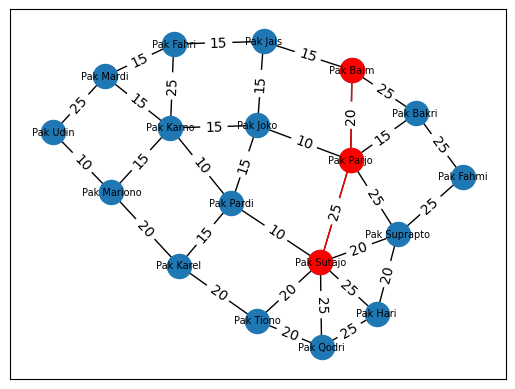

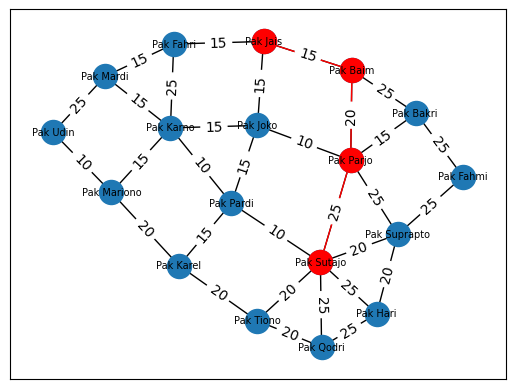

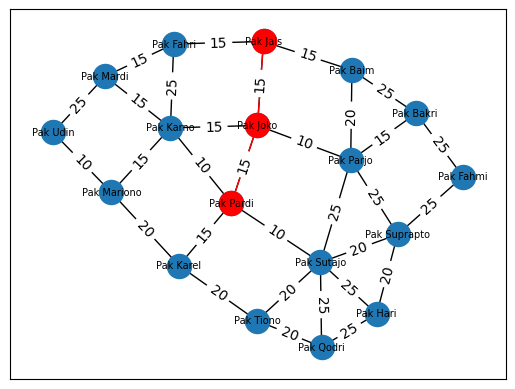

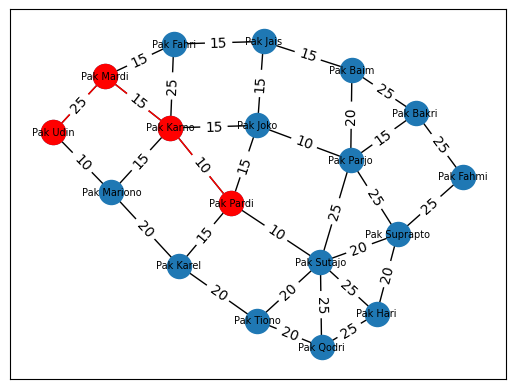

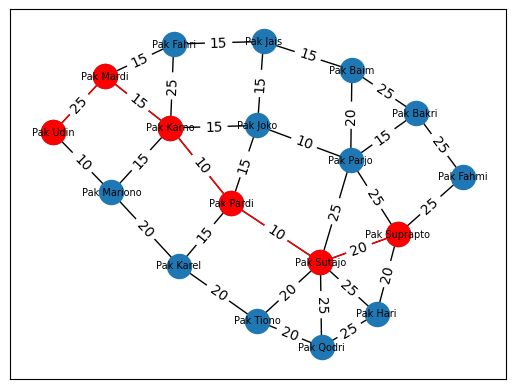

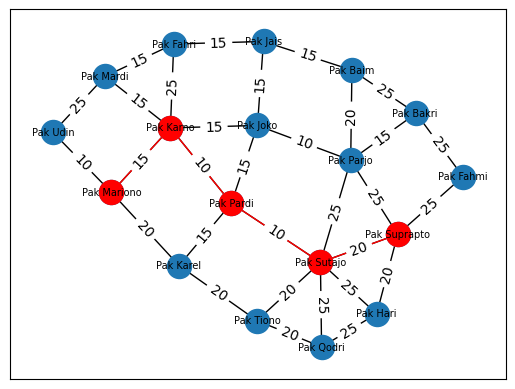

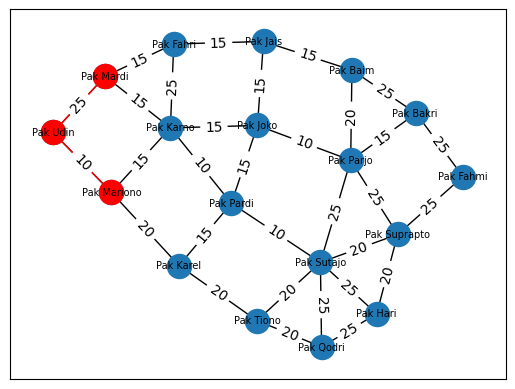

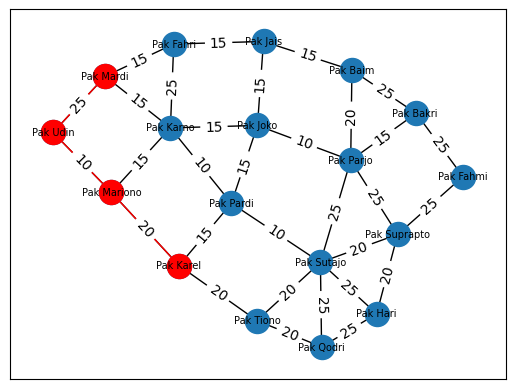

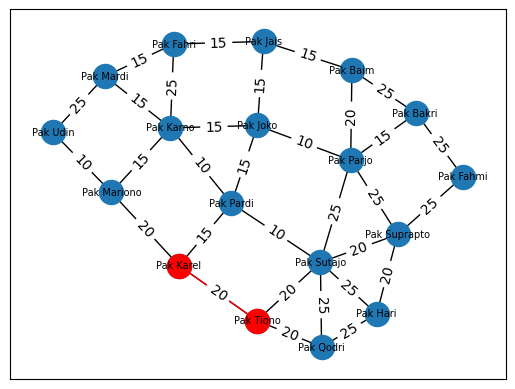

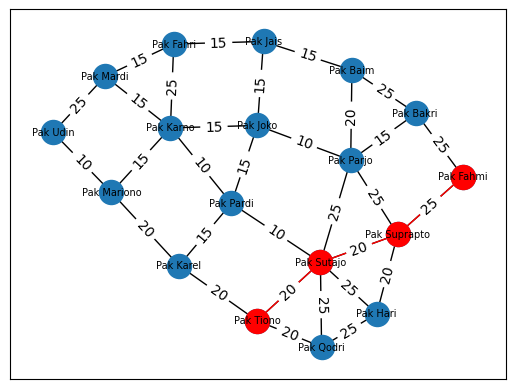

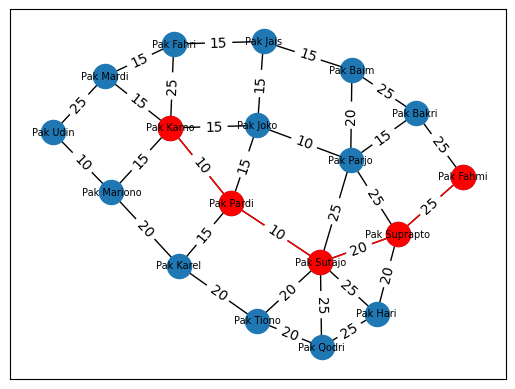

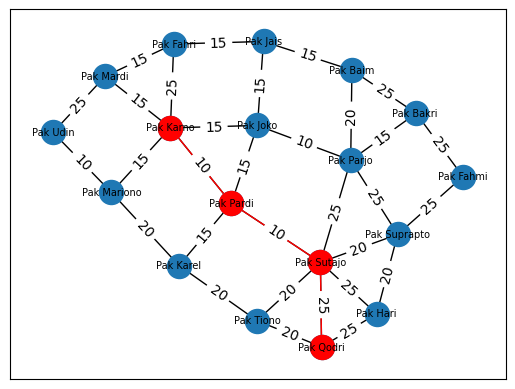

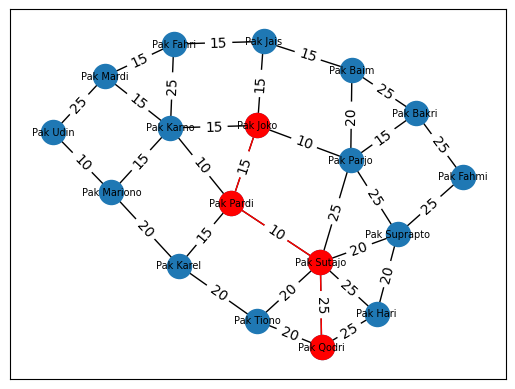

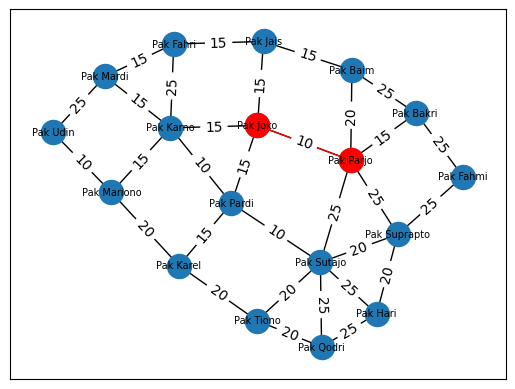

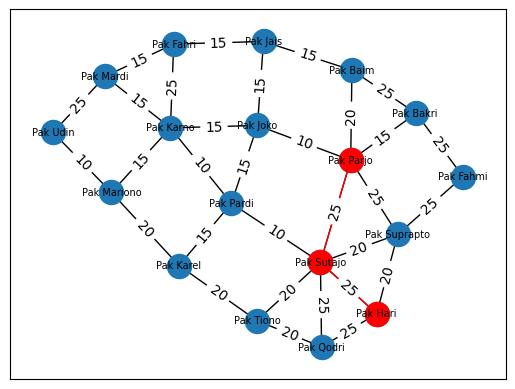

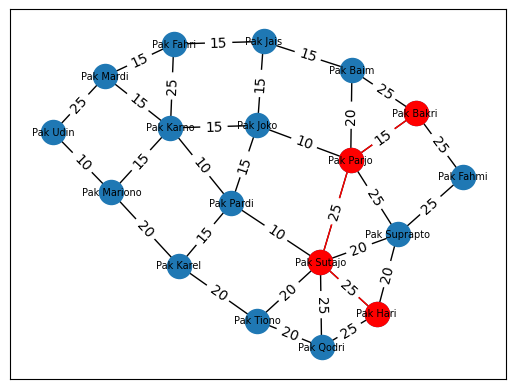

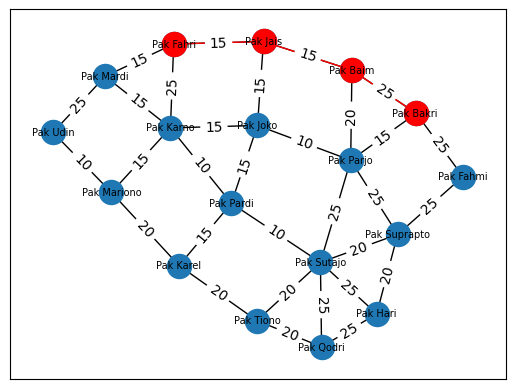

In [151]:
# User Input Kode_rumah
input_user = 'C14'

# Create path based on previous Graph and user input
routes = create_path(input_user, nodes, G)

print(routes)

for route in routes:
    # Draw highlight each route 
    highlight_path(G, pos, route)

## Creating THR Calculation

In [152]:
def calculate_thr(df, nodes, input_user):
    # Kode rumah with age that get thr example is C13

    # Get Data from df_data that age under or same 17 then get Kode Rumah info 
    thr_age = df.loc[df['age'] <= 17]['Kode Rumah'].values 

    # Info THR Per Person
    THR = list(thr_age).count(input_user) * 50000

    return THR * len(nodes[1:])

calculate_thr(df_data, nodes, input_user)

850000

## Calculating time

In [153]:
# Get note attribute with routes kode_rumah and save it to temp variable
def get_time(routes,df,df2):
    temp = list()
    for index, route in enumerate(routes):
        
        # Create a list (0,1) -> edge 
        route_list=sorted(set(list(zip(route,route[1:]))))  
        
        sum = 0
        for edge in route_list:
            
            # Add Time based on distance
            df_found_1 = df_edge.loc[df_edge['source'] == edge[0]]
            df_found_2 = df_found_1.loc[df_found_1['target'] == edge[1], 'distance']
            sum = sum + (df_found_2.values)            
            
            # Add Time based on Luas Rumah 
            luas = df2.loc[df2['Kode Rumah'] == edge[1], 'Luas Rumah'].values[0]
            if luas >= 200 :
                sum = sum + 30
            else:
                sum = sum + 15
            
        temp.insert(index, sum)
    return temp

for data in get_time(routes, df_edge,df_node):
    print(data[0])
    

90
120
90
110
200
145
80
115
50
155
170
135
140
25
110
140
130


In [154]:
input_time_user = '02:00'

# Function to get time data 
def to_time(input_time_user, minutes_to_add):
    
    for minute in minutes_to_add:
        current_time = pd.to_datetime(input_time_user)
        int(minutes_to_add)
    return pd.Timedelta(minutes=minutes_to_add)
    #     time = current_time + pd.Timedelta(minutes=minutes_to_add)

    # return time

print(to_time(input_time_user, get_time(routes, df_edge,df_node)))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

## Time add from input user

In [ ]:
input_time_user = '02:00'

# Function to get time data 
def to_time(input_time_user, minutes_to_add):
    current_time = pd.to_datetime(input_time_user)

    time = current_time + pd.Timedelta(minutes=minutes_to_add)

    return time

print(to_time(input_time_user, 60))

## Get Data makanan based per 1 route to the node

In [ ]:
def makanan(nodes,df):
    temp_node = []
    nodes=sorted(set(nodes[1:]))

    for index, node in enumerate(nodes):
        makanan = df.loc[df['Kode Rumah'] == node, 'Jenis Makanan']
        temp_node.insert(index, makanan.values[0])
    
    return temp_node

all_makanan = makanan(nodes, df_node)
print(all_makanan)

## APP TEST

In [ ]:
# User Input Kode_rumah
input_user = 'C13'
input_time_user = '02:00'
# Create path based on previous Graph and user input
routes = create_path(input_user, nodes, G)


print('============================================')   
print('ROUTE')
print(routes)

print('============================================')
print('PATH ROUTE WITH GRAPH')

for route in routes:
    # Draw highlight each route 
    highlight_path(G, pos, route) 
print('ALL MAKANAN')
all_makanan = makanan(nodes, df_node)
print(all_makanan)

print('============================================')

print('JADWAL')
for data in get_time(routes, df_edge,df_node): 
    input_time_user += pd.Timedelta(minutes=data[0])
    print(to_time(input_time_user, data[0]))
print('============================================')

print('JUMLAH THR')
print(calculate_thr(df_data, nodes, input_user))

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\pradi\AppData\Local\Temp\ipykernel_21564\1516246767.py", line 24, in <lambda>
    next_button = ttk.Button(window, text='Next', command=lambda: create_window(routes.pop(0), G, pos))
IndexError: pop from empty list


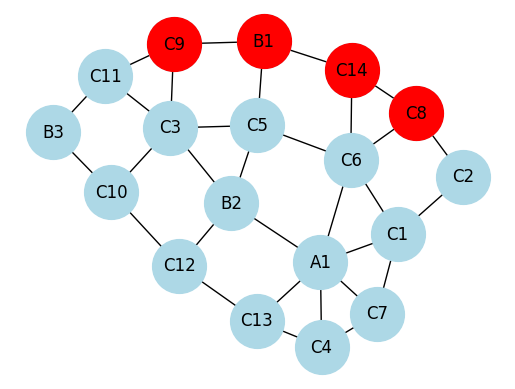

In [ ]:
def create_window(route, G, pos):
    window = tk.Tk()
    window.title('Path Route')
    

    fig, ax = plt.subplots()

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=route, node_color='r', node_size=1500, ax=ax)
    plt.axis('off')

    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    information = tk.Label(window, text=f'Total THR Sekarang: 0')
    information.pack(side=tk.TOP, fill=tk.BOTH)

    
    close_button = ttk.Button(window, text='Close', command=window.destroy)
    close_button.pack(side=tk.BOTTOM)


    next_button = ttk.Button(window, text='Next', command=lambda: create_window(routes.pop(0), G, pos))
    next_button.pack(side=tk.BOTTOM)



def inputWindow():
    inputWindow = tk.Tk()
    inputWindow.title('Input')
    inputWindow.geometry("300x250")
    inputWindow.resizable(False, False)

    clicked = tk.StringVar()
    clicked.set('Kode Rumah Anda')

    inputStart = tk.OptionMenu(inputWindow, clicked, *(df_data['Kode Rumah']))
    inputStart.pack(side=tk.TOP, fill=tk.BOTH)

    def on_submit():
        create_window(route, G, pos)

        inputWindow.destroy()

    inputButton = tk.Button(inputWindow, text='Submit', command=on_submit)
    inputButton.pack(side=tk.TOP, fill=tk.BOTH)

    inputWindow.mainloop()
inputWindow()